In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing necessary library
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
#Installing tensorflow
!pip install tensorflow

In [ ]:
#setting the image fixed size for training and intializing the batch size, channel and number of epochs
Image_Size= 256
Batch_Size = 32
Channels=3
Epochs=50

In [ ]:
#determining number of pics and classes
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "..//content/drive/My Drive/FinalProject/detection/",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size

)

Found 2041 files belonging to 1 classes.


In [ ]:
#present class name
class_names = dataset.class_names
class_names

['detection']

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


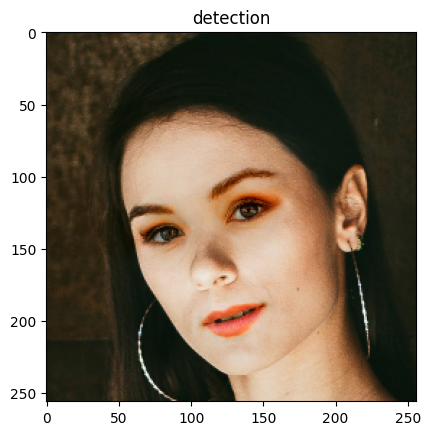

In [ ]:
#trying out for the first image
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [ ]:
#creating function for splitting dataset
def splitting_dataset_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split * ds_size)
    val_size= int(val_split * ds_size)

    train_ds= ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=splitting_dataset_tf(dataset)

In [ ]:

print(len(train_ds),len(val_ds),len(test_ds))

51 6 7


In [ ]:
#Data Pipeline Optimization for Training, Validation, and Testing Datasets
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#Image Preprocessing for Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
#Data augmentation
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [ ]:
#Building model architeture
input_shape = (Batch_Size,Image_Size, Image_Size,Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),
    ])

model.build(input_shape=input_shape)

In [ ]:
#Model Compilation with Optimizer and Loss Function
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#Model Training with Training and Validation Data
history = model.fit(
    train_ds,
    epochs=275,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/275
51/51 [==============================] - 160s 84ms/step - loss: 0.0578 - accuracy: 0.9804 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/275
51/51 [==============================] - 4s 87ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/275
51/51 [==============================] - 4s 80ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/275
51/51 [==============================] - 4s 80ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/275
51/51 [==============================] - 4s 86ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/275
51/51 [==============================] - 4s 80ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/275
51/51 [==============================] - 4s 80ms/step - loss: 0.0000e+00 - accuracy: 1.000

In [ ]:
#Checking accuracy of the model
scores = model.evaluate(test_ds)

In [ ]:
#Predicting Labels for a Batch of Images
import numpy as np

for image_batch, label_batch in dataset.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label : ",class_names[first_label])


    batch_pred = model.predict(image_batch)
    print("Pred label : ",class_names[np.argmax(batch_pred[0])])

In [ ]:
#Image Prediction Function Using the Model
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
#Displaying Sample Predictions with Confidence
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")

        plt.axis("off")

In [ ]:
import numpy as np
from PIL import Image
from keras.preprocessing import image as keras_image

first_image = Image.open("..//content/drive/MyDrive/FinalProject/detection/fake/easy_1_1110.jpg")
img_array = keras_image.img_to_array(first_image)
img_array = np.expand_dims(img_array, axis=0)
first_label = "fake"


plt.imshow(first_image)
plt.show()

print("Actual label:", first_label)
pred = model.predict(img_array)
#print("Predicted label:", pred)
print("Pred label : ",class_names[np.argmax(pred[0])])

In [ ]:
import numpy as np
from PIL import Image
from keras.preprocessing import image as keras_image

first_image = Image.open("..//content/drive/MyDrive/FinalProject/detection/real/real_00001.jpg")
img_array = keras_image.img_to_array(first_image)
img_array = np.expand_dims(img_array, axis=0)
first_label = "real"


plt.imshow(first_image)
plt.show()

print("Actual label:", first_label)
pred = model.predict(img_array)
#print("Predicted label:", pred)
print("Pred label : ",class_names[np.argmax(pred[0])])

In [ ]:
#externalimage
import numpy as np
from PIL import Image
from keras.preprocessing import image as keras_image

first_image = Image.open("..//content/drive/MyDrive/FinalProject/external_images/fake1.jpg")
img_array = keras_image.img_to_array(first_image)
img_array = np.expand_dims(img_array, axis=0)
first_label = "fake"

plt.imshow(first_image)
plt.show()

print("Actual label:", first_label)
pred = model.predict(img_array)
#print("Predicted label:", pred)
print("Pred label : ",class_names[np.argmax(pred[0])])

In [ ]:
#externalimage
import numpy as np
from PIL import Image
from keras.preprocessing import image as keras_image

first_image = Image.open("..//content/drive/MyDrive/FinalProject/external_images/real2.jpg")
img_array = keras_image.img_to_array(first_image)
img_array = np.expand_dims(img_array, axis=0)
first_label = "real"


plt.imshow(first_image)
plt.show()

print("Actual label:", first_label)
pred = model.predict(img_array)
#print("Predicted label:", pred)
print("Pred label : ",class_names[np.argmax(pred[0])])

In [ ]:
#externalimage
import numpy as np
from PIL import Image
from keras.preprocessing import image as keras_image

first_image = Image.open("..//content/drive/MyDrive/FinalProject/external_images/satya_real.jpg")
img_array = keras_image.img_to_array(first_image)
img_array = np.expand_dims(img_array, axis=0)
first_label = "real"


plt.imshow(first_image)
plt.show()

print("Actual label:", first_label)
pred = model.predict(img_array)
#print("Predicted label:", pred)
print("Pred label : ",class_names[np.argmax(pred[0])])